In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [20]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [3]:
from load_ensembles import *

In [4]:
spunupyr=60

In [5]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0003_PI_v02/lnd/proc/tseries/'+
                   'OFFL0003_PI_v02.clm2.h0.timeseries.WTGQ.nc')

# Calculate albedo

In [6]:
basecase_lnd_offline_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSDS'+'.nc')
basecase_lnd_offline_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSA'+'.nc')

In [8]:
ensemble_offline_FSDS=load_offline_ensemble(var='FSDS', domain='lnd')
ensemble_offline_FSA=load_offline_ensemble(var='FSA', domain='lnd')

In [9]:
ensemble_offline_FSDS.append(basecase_lnd_offline_FSDS)
ensemble_offline_FSA.append(basecase_lnd_offline_FSA)

In [10]:
FSDS=ensemble_offline_FSDS[0]['FSDS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
FSA=ensemble_offline_FSA[0]['FSA'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
albedo=1-FSA/FSDS

In [11]:
FSDS_ref=basecase_lnd_offline_FSDS['FSDS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
FSA_ref=basecase_lnd_offline_FSA['FSA'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
albedo_ref=1-FSA_ref/FSDS_ref

In [ ]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'albedo'+'.nc'

In [ ]:
for i, ds in enumerate(ensemble_offline_FSA):
    casename=ensemble_offline_FSA[i].case_id
    FSDS=ensemble_offline_FSDS[i]['FSDS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    FSA=ensemble_offline_FSA[i]['FSA'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    albedo=1-FSA/FSDS
    ds_albedo=albedo.to_dataset('albedo')
    ds_albedo.to_netcdf(fpath_out+casename+suffix)

# Calculate albedo with snow masking

In [5]:
basecase_lnd_offline_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSDS'+'.nc')
basecase_lnd_offline_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSA'+'.nc')
basecase_lnd_offline_FSNO=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSNO'+'.nc')

In [6]:
ensemble_offline_FSDS=load_offline_ensemble(var='FSDS', domain='lnd')
ensemble_offline_FSA=load_offline_ensemble(var='FSA', domain='lnd')
ensemble_offline_FSNO=load_offline_ensemble(var='FSNO', domain='lnd')

In [7]:
ensemble_offline_FSDS.append(basecase_lnd_offline_FSDS)
ensemble_offline_FSA.append(basecase_lnd_offline_FSA)
ensemble_offline_FSNO.append(basecase_lnd_offline_FSNO)

In [8]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'albedo_snowmasked'+'.nc'

In [9]:
for i, ds in enumerate(ensemble_offline_FSA):
    casename=ds.case_id
    FSDS=ensemble_offline_FSDS[i]['FSDS'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    FSA=ensemble_offline_FSA[i]['FSA'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    FSNO=ensemble_offline_FSNO[i]['FSNO'][spunupyr*12:,:,:]
    FSDS_masked=FSDS.where(FSNO<0.00001).groupby('time.month').mean(dim='time')
    FSA_masked=FSA.where(FSNO<0.00001).groupby('time.month').mean(dim='time')
    albedo=1-FSA_masked/FSDS_masked
    ds_albedo=albedo.to_dataset('albedo_snowmasked')
    ds_albedo.to_netcdf(fpath_out+casename+suffix)

# Calculate vegetation height

In [37]:
basecase_lnd_offline_HTOP=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'HTOP'+'.nc')

In [38]:
ensemble_offline_HTOP=load_offline_ensemble(var='HTOP', domain='lnd')
ensemble_offline_HTOP.append(basecase_lnd_offline_HTOP)

In [39]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'veg_height'+'.nc'

In [40]:
for i, ds in enumerate(ensemble_offline_HTOP):
    casename=ds.case_id
    HTOP=ds['HTOP'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_htop=HTOP.to_dataset('veg_height')
    ds_htop.to_netcdf(fpath_out+casename+suffix)

# Calculate tracer conductance

In [13]:
basecase_lnd_offline_WTGQ=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'WTGQ'+'.nc')

In [14]:
ensemble_offline_WTGQ=load_offline_ensemble(var='WTGQ', domain='lnd')
ensemble_offline_WTGQ.append(basecase_lnd_offline_WTGQ)

In [15]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'WTGQ'+'.nc'

In [34]:
for i, ds in enumerate(ensemble_offline_WTGQ):
    casename=ds.case_id
    HTOP=ds['WTGQ'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_htop=HTOP.to_dataset('WTGQ')
    ds_htop.to_netcdf(fpath_out+casename+suffix)

In [31]:
ref=basecase_lnd_offline_TS['TSKIN'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')

d_max, min


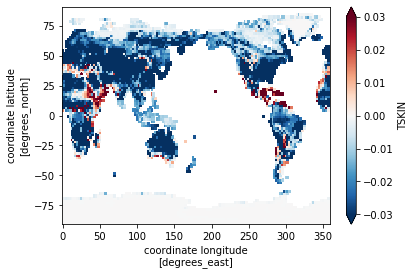

In [37]:
i=2
print(crosswalk.description.values[i])
ds=ensemble_offline_TS[i]
ds_avg=ds['TSKIN'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
delta=ds_avg-ref
delta.mean(dim='month').plot(vmax=0.03)#vmax=0.001)

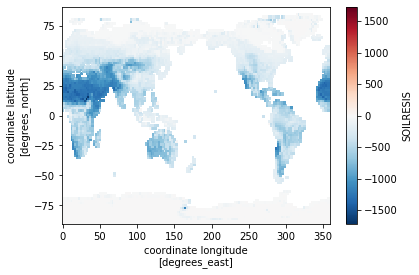

In [44]:
ref=basecase_lnd_offline_Rsoil['SOILRESIS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
ds=ensemble_offline_Rsoil[i]
ds_avg=ds['SOILRESIS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
delta=ds_avg-ref
delta.mean(dim='month').plot()#vmax=0.001)#vmax=0.001)

# Calculate TAUX

In [32]:
basecase_lnd_offline_TAUX=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TAUX'+'.nc')
basecase_lnd_offline_TAUY=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TAUY'+'.nc')

In [33]:
ensemble_offline_TAUX=load_offline_ensemble(var='TAUX', domain='lnd')
ensemble_offline_TAUY=load_offline_ensemble(var='TAUY', domain='lnd')

ensemble_offline_TAUX.append(basecase_lnd_offline_TAUX)
ensemble_offline_TAUY.append(basecase_lnd_offline_TAUY)

In [35]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'TAUX'+'.nc'

for i, ds in enumerate(ensemble_offline_TAUX):
    casename=ds.case_id
    var=ds['TAUX'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_var=var.to_dataset('TAUX')
    ds_var.to_netcdf(fpath_out+casename+suffix)

In [36]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'TAUY'+'.nc'

for i, ds in enumerate(ensemble_offline_TAUY):
    casename=ds.case_id
    var=ds['TAUY'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_var=var.to_dataset('TAUY')
    ds_var.to_netcdf(fpath_out+casename+suffix)

# Calculate soil resistance

In [6]:
basecase_lnd_offline_Rsoil=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'SOILRESIS'+'.nc')

In [7]:
ensemble_offline_Rsoil=load_offline_ensemble(var='SOILRESIS', domain='lnd')
ensemble_offline_Rsoil.append(basecase_lnd_offline_Rsoil)

In [8]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'SOILRESIS'+'.nc'

In [9]:
for i, ds in enumerate(ensemble_offline_Rsoil):
    casename=ds.case_id
    var=ds['SOILRESIS'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_var=var.to_dataset('SOILRESIS')
    ds_var.to_netcdf(fpath_out+casename+suffix)

# Calculate temperature

In [29]:
basecase_lnd_offline_TS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TSKIN'+'.nc')

In [30]:
ensemble_offline_TS=load_offline_ensemble(var='TSKIN', domain='lnd')
ensemble_offline_TS.append(basecase_lnd_offline_TS)

In [45]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'Ts'+'.nc'

In [46]:
for i, ds in enumerate(ensemble_offline_TS):
    casename=ds.case_id
    Ts=ds['TSKIN'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_Ts=Ts.to_dataset('Ts')
    ds_Ts.to_netcdf(fpath_out+casename+suffix)

# Calculate coupled temperature

In [7]:
basecase_lnd_coupled_TS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/'+
                                        'COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'TSKIN'+'.nc')

In [8]:
ensemble_coupled_TS=load_coupled_ensemble(var='TSKIN', domain='lnd')
ensemble_coupled_TS.append(basecase_lnd_coupled_TS)

In [9]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'Ts'+'.nc'

In [10]:
for i, ds in enumerate(ensemble_coupled_TS):
    casename=ds.case_id
    Ts=ds['TSKIN'][spunupyr*12:,:,:].groupby('time.month').mean(dim='time')
    ds_Ts=Ts.to_dataset('Ts')
    ds_Ts.to_netcdf(fpath_out+casename+suffix)

# Calculate evaporative resistance

In [6]:
basecase_lnd_offline_LAISUN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISUN'+'.nc')
basecase_lnd_offline_LAISHA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISHA'+'.nc')
basecase_lnd_offline_GSSUNLN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSUNLN'+'.nc')
basecase_lnd_offline_GSSHALN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSHALN'+'.nc')

In [7]:
ensemble_offline_LAISUN=load_offline_ensemble(var='LAISUN', domain='lnd')
ensemble_offline_LAISHA=load_offline_ensemble(var='LAISHA', domain='lnd')
ensemble_offline_GSSUNLN=load_offline_ensemble(var='GSSUNLN', domain='lnd')
ensemble_offline_GSSHALN=load_offline_ensemble(var='GSSHALN', domain='lnd')

In [8]:
ensemble_offline_LAISUN.append(basecase_lnd_offline_LAISUN)
ensemble_offline_LAISHA.append(basecase_lnd_offline_LAISHA)
ensemble_offline_GSSUNLN.append(basecase_lnd_offline_GSSUNLN)
ensemble_offline_GSSHALN.append(basecase_lnd_offline_GSSHALN)

In [9]:
fpath_out='/glade/work/czarakas/coupled_PPE/data/annual_means/'
suffix='.clm2.h0.annual_averages.'+'Rs'+'.nc'

In [29]:
for i, ds in enumerate(ensemble_offline_LAISUN):
    casename=ensemble_offline_LAISUN[i].case_id
    
    LAIsun=ensemble_offline_LAISUN[i]['LAISUN'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    LAIsha=ensemble_offline_LAISHA[i]['LAISHA'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    GSsun=ensemble_offline_GSSUNLN[i]['GSSUNLN'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    GSsha=ensemble_offline_GSSHALN[i]['GSSHALN'][spunupyr*12:,:,:]#.groupby('time.month').mean(dim='time')
    
    GS=(GSsha*LAIsha)+(GSsun*LAIsun)
    RS=42.3e6/GS
    RS=RS.where(RS<=1000,1000).where(~np.isnan(LAIsun[0,:,:])).groupby('time.month').mean(dim='time')
    
    ds_rs=RS.to_dataset('Rs')
    ds_rs.to_netcdf(fpath_out+casename+suffix)

# Look at base case

In [30]:
ref_rs=xr.open_dataset(fpath_out+
                       'OFFL0000_PI_v02.clm2.h0.annual_averages.Rs.nc')['Rs']

In [34]:
ref_albedo=xr.open_dataset(fpath_out+
                       'OFFL0000_PI_v02.clm2.h0.annual_averages.albedo.nc')['albedo']

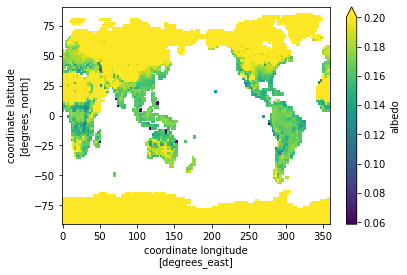

In [36]:
ref_albedo.mean(dim='month').plot(vmax=0.2)

# Check files

In [10]:
import glob
fnames=glob.glob(fpath_out+'*.albedo_snowmasked.nc')

In [13]:
ds_ref=xr.open_dataset(fpath_out+
                       'OFFL0000_PI_v02.clm2.h0.annual_averages.albedo_snowmasked.nc')

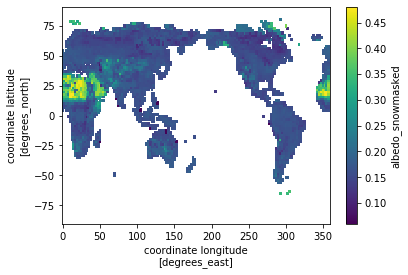

In [14]:
ds_ref.albedo_snowmasked.mean(dim='month').plot()

/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0033_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0036_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0011_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0028_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0018_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0019_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0009_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0017_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0024_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_PPE/data/annual_means/OFFL0001_PI_v02.clm2.h0.annual_averages.Rs.nc
/glade/work/czarakas/coupled_P

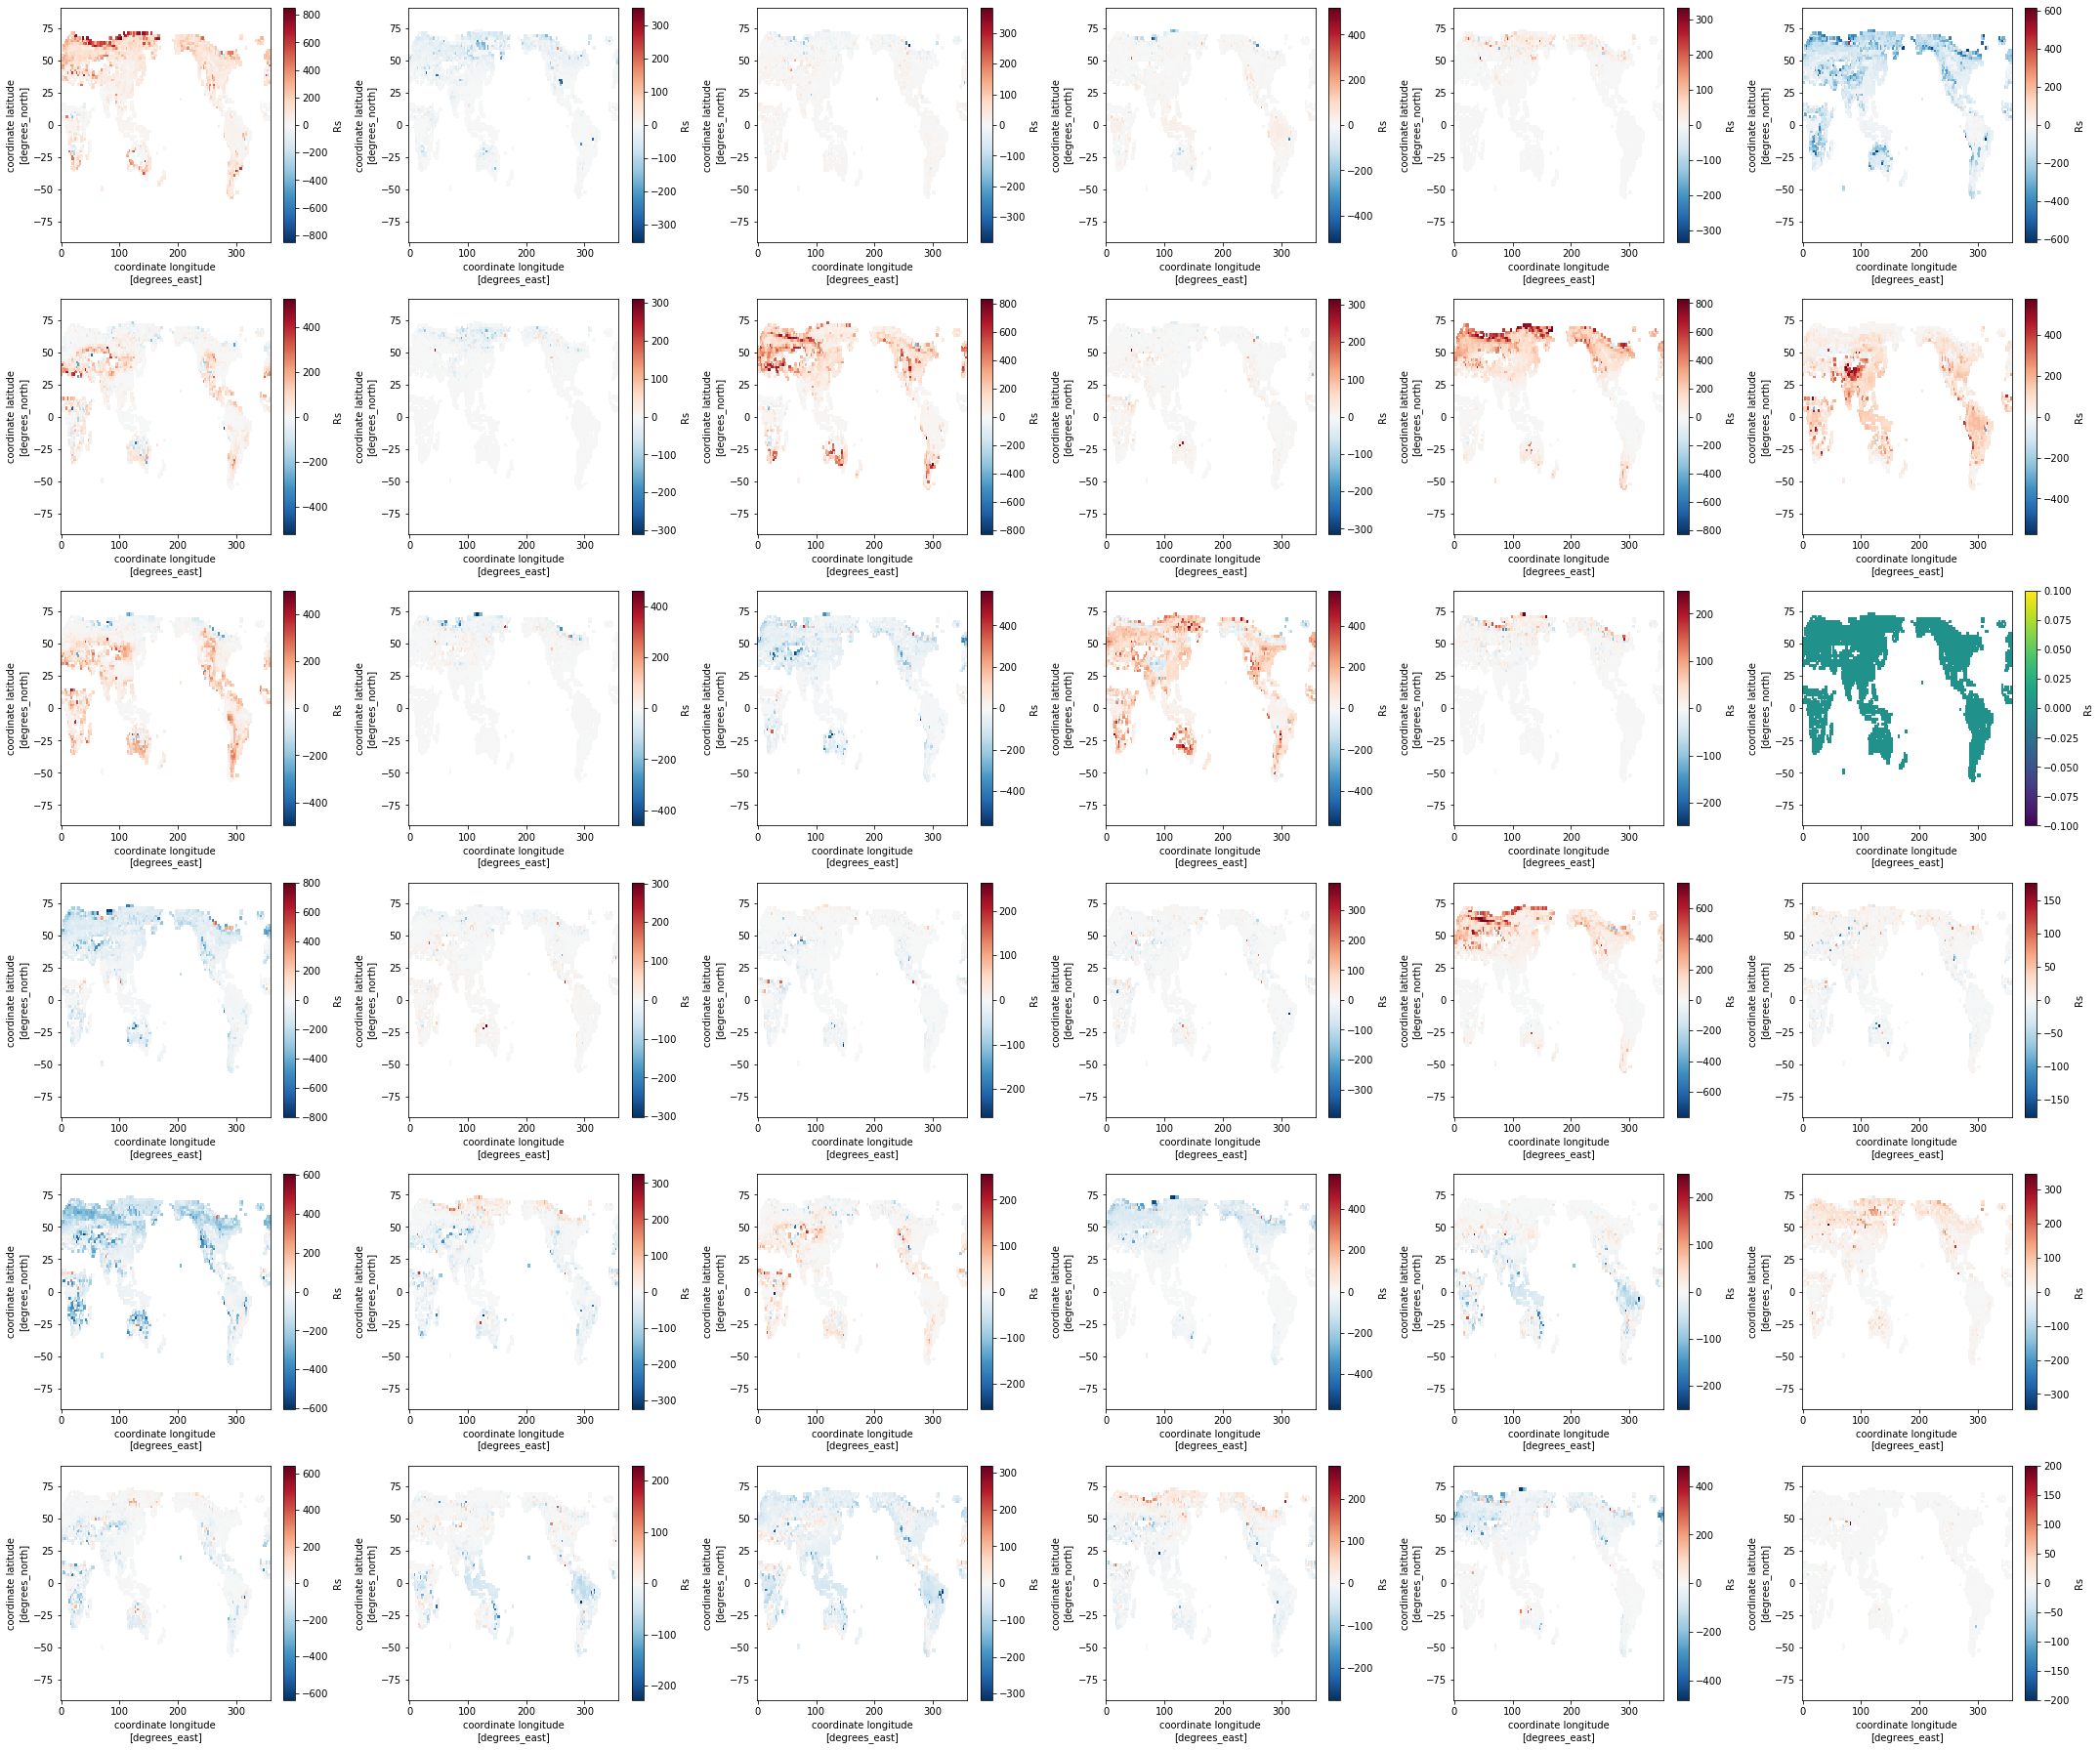

In [14]:
plt.figure(figsize=(30,25))
for i,fname in enumerate(fnames[0:36]):
    ds=xr.open_dataset(fname)
    plt.subplot(6,6,i+1)
    (ds['Rs'].where(ds['Rs']<1000)-ds_ref['Rs'].where(ds_ref['Rs']<1000)).mean(dim='month').plot()
    

plt.tight_layout()

# X

In [4]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/'+
                   'OFFL0000_PI_v02/lnd/hist/'+
                   'OFFL0000_PI_v02.clm2.h0.0099-02-01-00000.nc')

In [6]:
ensemble_offline_Ts=load_offline_ensemble(var='TSKIN', domain='lnd')
ensemble_offline_LH=load_offline_ensemble(var='EFLX_LH_TOT', domain='lnd')
ensemble_offline_SH=load_offline_ensemble(var='FSH', domain='lnd')
ensemble_offline_FIRA=load_offline_ensemble(var='FIRA', domain='lnd') #	net infrared (longwave) radiation
ensemble_offline_FIRE=load_offline_ensemble(var='FIRE', domain='lnd') #emitted infrared (longwave) radiation
ensemble_offline_HTOP=load_offline_ensemble(var='HTOP', domain='lnd')

<xarray.DataArray 'FSNO' (time: 120, lat: 96, lon: 144)>
[1658880 values with dtype=float32]
Coordinates:
  * time     (time) object 0099-02-01 00:00:00 ... 0109-01-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
Attributes:
    long_name:     fraction of ground covered by snow
    units:         unitless
    cell_methods:  time: mean

In [ ]:
basecase_lnd_offline_Ts=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TSKIN'+'.nc')

basecase_lnd_offline_LH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'EFLX_LH_TOT'+'.nc')
basecase_lnd_offline_SH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSH'+'.nc')
basecase_lnd_offline_FIRE=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRE'+'.nc')
basecase_lnd_offline_FIRA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRA'+'.nc')

basecase_lnd_offline_HTOP=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'HTOP'+'.nc')

In [15]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0001_PI_v02/lnd/hist/'+
                   'OFFL0001_PI_v02.clm2.h0.0129-02-01-00000.nc')

In [21]:
for i,var in enumerate(ds.variables):
    if i>12:
        print(var)
        print(ds[var].long_name)

lon
coordinate longitude
lat
coordinate latitude
area
grid cell areas
landfrac
land fraction
landmask
land/ocean mask (0.=ocean and 1.=land)
pftmask
pft real/fake mask (0.=fake and 1.=real)
nbedrock
index of shallowest bedrock layer
ACTUAL_IMMOB
actual N immobilization
AGNPP
aboveground NPP
ALT
current active layer thickness
ALTMAX
maximum annual active layer thickness
AR
autotrophic respiration (MR + GR)
ATM_TOPO
atmospheric surface height
BAF_CROP
fractional area burned for crop
BAF_PEATF
fractional area burned in peatland
BCDEP
total BC deposition (dry+wet) from atmosphere
BGNPP
belowground NPP
BTRAN2
root zone soil wetness factor
BTRANMN
daily minimum of transpiration beta factor
CH4PROD
Gridcell total production of CH4
CH4_SURF_AERE_SAT
aerenchyma surface CH4 flux for inundated area; (+ to atm)
CH4_SURF_AERE_UNSAT
aerenchyma surface CH4 flux for non-inundated area; (+ to atm)
CH4_SURF_DIFF_SAT
diffusive surface CH4 flux for inundated / lake area; (+ to atm)
CH4_SURF_DIFF_UNSAT
dif

In [ ]:
SOILRESIS
WTGQ

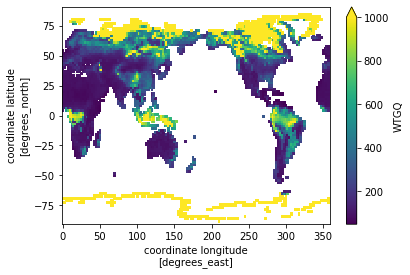

In [25]:
(1/ds.WTGQ.mean(dim='time')).plot(vmax=1000)